In [1]:

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk(r'C:\Users\thala\Downloads\Genre Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



C:\Users\thala\Downloads\Genre Dataset\description.txt
C:\Users\thala\Downloads\Genre Dataset\test_data.txt
C:\Users\thala\Downloads\Genre Dataset\test_data_solution.txt
C:\Users\thala\Downloads\Genre Dataset\train_data.txt


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv(r"C:\Users\thala\Downloads\Genre Dataset\train_data.txt",sep=":::",names=['movie','genre','description'],engine='python')

In [4]:
test_data = pd.read_csv(r"C:\Users\thala\Downloads\Genre Dataset\test_data_solution.txt",sep=":::",names=['movie','genre','description'],engine='python')

In [6]:
test_data.head()

,movie,genre,description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [11]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
!pip install --upgrade pip


ERROR: To modify pip, please run the following command:
C:\Users\thala\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 87.5 kB/s eta 0:00:21
    --------------------------------------- 0.0/1.8 MB 87.5 kB/s eta 0:00:21
    --------------------------------------- 0.0/1.8 MB 87.5 kB/s eta 0:00:21
    --------------------------------------- 0.0/1.8 MB 87.5 kB/s eta 0:00:21
    --------------------------------------- 0.0/1.8 MB 73.0 kB/s eta 0

In [10]:
pip --version


pip 24.0 from C:\Users\thala\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip (python 3.12)

Note: you may need to restart the kernel to use updated packages.


In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import string
nltk.download('stopwords')
nltk.download('punkt')
stopwords=set(stopwords.words('english'))
stemmer=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thala\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [8]:

def clean(text):
    text=re.sub(r'/W',' ',text)
    text=re.sub(r'http\+S',' ',text)
    tokens=word_tokenize(text.lower())
    stemmed_words=[stemmer.stem(token) for token in tokens if token.isalpha() and token not in stopwords]
    return " ".join(stemmed_words)
    

In [10]:
train_data['description']=train_data['description'].apply(clean)
test_data['description']=test_data['description'].apply(clean)

In [11]:
train_data

,movie,genre,description
1,Oscar et la dame rose (2009),drama,listen conver doctor parent oscar learn nobodi...
2,Cupid (1997),thriller,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,bu empti student field trip museum natur histo...
4,The Secret Sin (1915),drama,help unemploy father make end meet edith twin ...
5,The Unrecovered (2007),drama,film titl refer bodi ground zero also state na...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,nbc live sitcom center bonino concert singer l...
54211,Dead Girls Don't Cry (????),horror,next gener exploit sister kapa bay soror hou m...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,ze bestaan echt comedi grow face fear freer or...
54213,Make Your Own Bed (1944),comedy,walter vivian live countri difficult time keep...


In [12]:
test_data.head()

,movie,genre,description
1,Edgar's Lunch (1998),thriller,brane love life car apart job especi girlfrien...
2,La guerra de papá (1977),comedy,spain march quico naughti child three belong w...
3,Off the Beaten Track (2010),documentary,one year life albin famili shepherd north tran...
4,Meu Amigo Hindu (2015),drama,father die spoken brother year seriou cancer d...
5,Er nu zhai (1955),drama,known intern martial art superstar bruce lee a...


In [14]:
def barplot(data):
    genre_value_counts=data['genre'].value_counts()
    plt.figure(figsize=(12,8))
    genre_value_counts.plot(kind='bar')
    plt.title='Distribution of Movies Genre'
    plt.xlabel='Genre' 
    plt.ylabel='No. of Movies'
    plt.xticks(rotation=45)
    plt.show
    

In [15]:
train_data.to_csv('cleaned_train.csv')

In [16]:
test_data.to_csv('cleaned_test.csv')

In [17]:
train_data['genre']=train_data['genre'].str.strip()
test_data['genre']=test_data['genre'].str.strip()

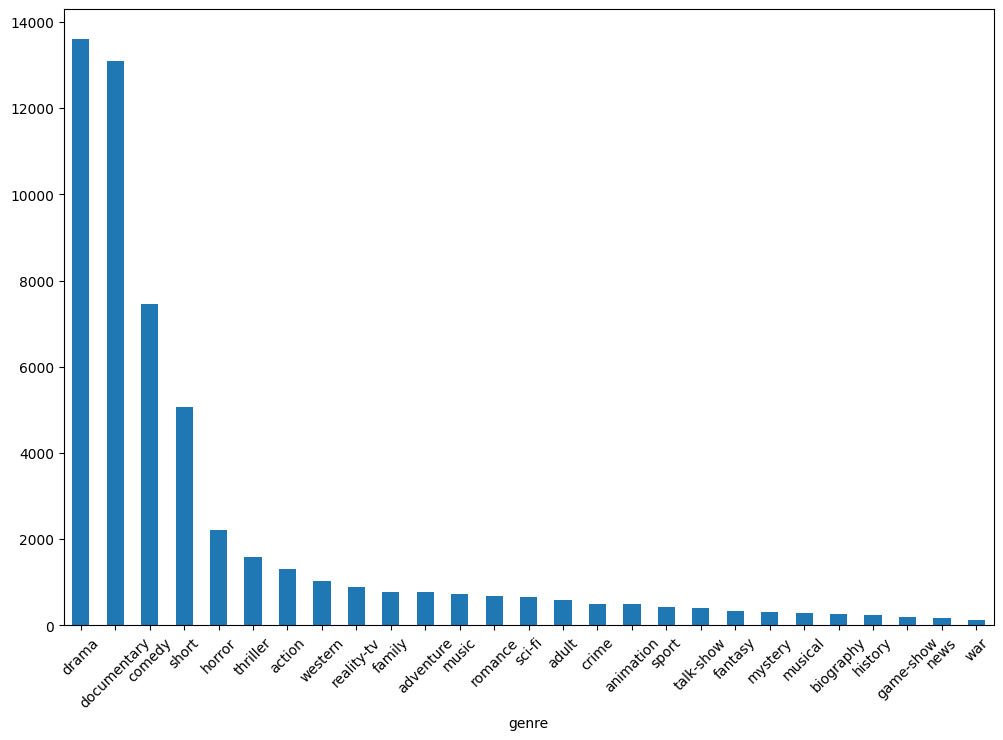

In [18]:
barplot(train_data)

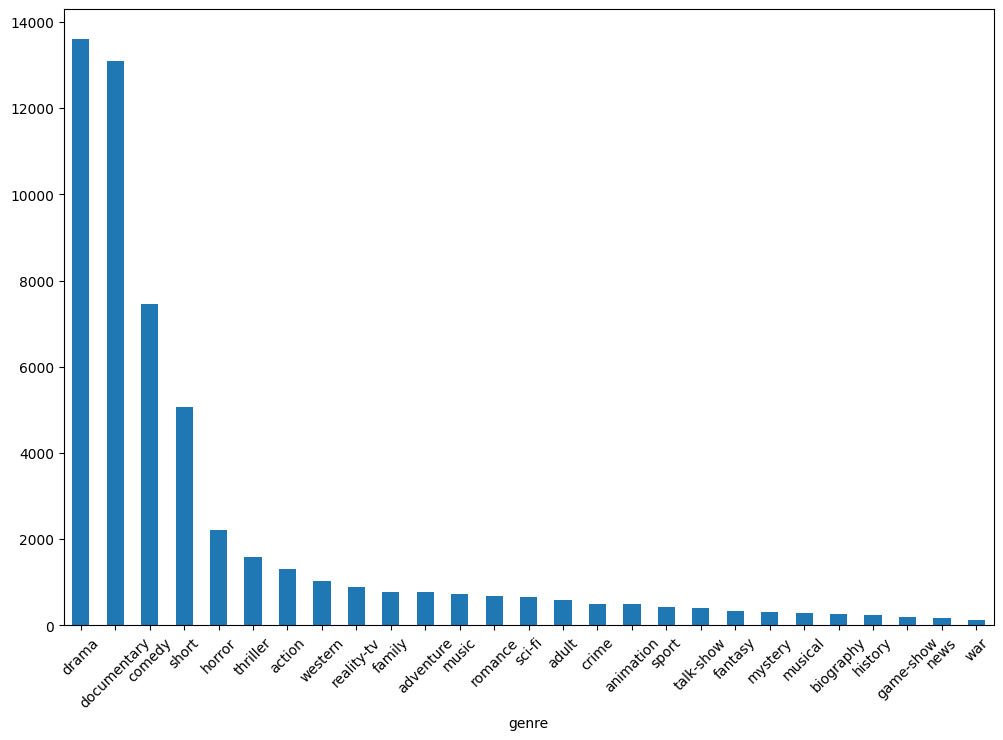

In [19]:
barplot(test_data)

In [20]:
train_data.duplicated().sum()

0

In [23]:
pip install wordcloud



   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 119.1 kB/s eta 0:00:03
   --- ----------------------------------- 30.7/301.4 kB 119.1 kB/s eta 0:00:03
   --- ----------------------------------- 30.7/301.4 kB 119.1 kB/s eta 0:00:03
   ----- ---------------------------------- 41.0/301.4 kB 98.1 kB/s eta 0:00:03
   ----- ---------------------------------- 41.0/301.4 kB 98.1 kB/s eta 0:00:03
   ----- ---------------------------------- 41.0/301.4 kB 98.1 kB/s eta 0:00:03
   ------- ------------------------------- 61.4/301.4 kB 109.2 kB/s eta 0:00:03
   ------- ------------------------------- 61.4/301.4 kB 109.2 kB/s eta 0:00:03
 


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
test_data.duplicated().sum()

0

In [24]:
from wordcloud import WordCloud
def word_cloud(data):
    all_desc=' '.join(data['description'])
    wordcloud=WordCloud(height=400,width=800,background_color='white').generate(all_desc)
    plt.figure(figsize=(10,5))

    plt.axis('off')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.show()

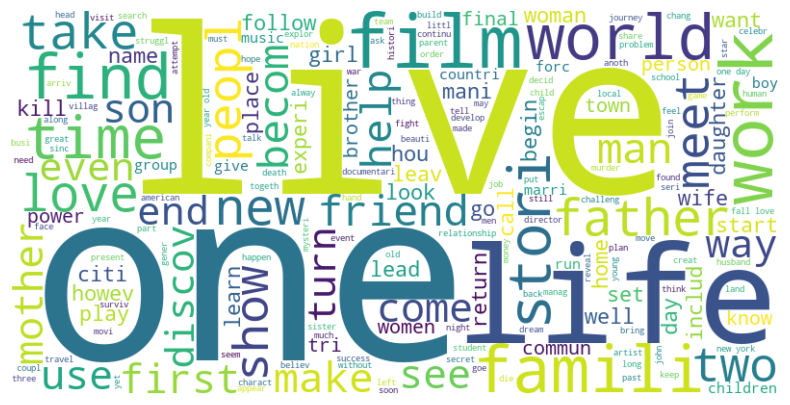

In [25]:
word_cloud(train_data)

In [27]:
x=train_data['description']
y=train_data['genre']
x_test=test_data['description']
y_test=test_data['genre']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
X_train

19254    sex betray seduct manipul addict love hate van...
12262    autist teen toni friendship cameron boy still ...
37144    special examin social ethnic religi econom div...
21966    person narr documentari use bicycl ride work v...
7034     villag policeman artturi sakari reinikainen se...
                               ...                        
11285    david cronenberg canadian director american co...
44733    adan neumann member jewish famili live berlin ...
38159    miranda lesbian photograph guayaquil live buen...
861      enemi profess live chiang sia qv former mercen...
15796    fashion design malan breton revisit birth rite...
Name: description, Length: 43371, dtype: object

In [31]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(x_test)
X_valid=vectorizer.transform(X_valid)


In [32]:

X_train

<43371x77465 sparse matrix of type '<class 'numpy.float64'>'
	with 1987288 stored elements in Compressed Sparse Row format>

In [34]:
pip install xgboost



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 119.1 kB/s eta 0:17:29
   ---------------------------------------- 0.0/124.9 MB 119.1 kB/s eta 0:17:29
   ---------------------------------------- 0.0/124.9 MB 119.1 kB/s eta 0:17:29
   ---------------------------------------- 0.0/124.9 MB 93.7 kB/s eta 0:22:14
   ---------------------------------------- 0.0/124.9 MB 93.7 kB/s eta 0:22:14
   ---------------------------------------- 0.0/124.9 MB 93.7 kB/s eta 0:22:14
   ---------------------------------------- 0.0/124.9 MB 93.7 kB/s eta 0:22:14
   --------------

In [35]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report

In [36]:
import warnings
import joblib
warnings.filterwarnings('ignore')
from time import time

In [37]:
svm_model=SVC()

In [38]:
#SVM model training
print('Model:SVM')
print('_'*30)
start=time()
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_valid)
end=time()
#SVM Validation dataset test
print(classification_report(y_valid,y_pred))
print(f'\nAccuracy score: {accuracy_score(y_valid,y_pred)} \nRunning Time: {round((end-start)/60.0,2)} Min')
print('*'*30)

Model:SVM
______________________________
              precision    recall  f1-score   support

      action       0.57      0.19      0.29       263
       adult       0.89      0.22      0.36       112
   adventure       0.48      0.11      0.18       139
   animation       0.33      0.01      0.02       104
   biography       0.00      0.00      0.00        61
      comedy       0.53      0.57      0.55      1443
       crime       0.00      0.00      0.00       107
 documentary       0.65      0.86      0.74      2659
       drama       0.51      0.82      0.63      2697
      family       0.79      0.07      0.13       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.94      0.40      0.56        40
     history       0.00      0.00      0.00        45
      horror       0.67      0.59      0.63       431
       music       0.72      0.33      0.45       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0

In [39]:
LogisticRegression=LogisticRegression(max_iter=1000)

In [40]:
#Logistic Regression model training
print('Model: Logistic Regression')
print('_'*30)
start=time()
LogisticRegression.fit(X_train,y_train)
y_pred=LogisticRegression.predict(X_valid)
end=time()
#Logistic Regression Validation dataset test
print(classification_report(y_valid,y_pred))
print(f'\nAccuracy score: {accuracy_score(y_valid,y_pred)} \nRunning Time: {round((end-start)/60.0,2)} Min')
print('*'*30)

Model: Logistic Regression
______________________________
              precision    recall  f1-score   support

      action       0.55      0.26      0.35       263
       adult       0.82      0.25      0.38       112
   adventure       0.38      0.12      0.18       139
   animation       0.44      0.04      0.07       104
   biography       0.00      0.00      0.00        61
      comedy       0.52      0.58      0.55      1443
       crime       0.40      0.02      0.04       107
 documentary       0.67      0.85      0.75      2659
       drama       0.53      0.80      0.64      2697
      family       0.50      0.09      0.16       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.89      0.42      0.58        40
     history       0.00      0.00      0.00        45
      horror       0.65      0.58      0.62       431
       music       0.65      0.48      0.55       144
     musical       0.00      0.00      0.00        50
     mystery       0.00

In [34]:
test_models = {
    'Logistic Regression': LogisticRegression,
    'SVM':svm_model
}

In [35]:
def test_model(xtest,ytest):
    for name,model in test_models.items():
        print('Model:'+name)
        print('_'*30)
        start=time()
        y_pred=model.predict(xtest)
        end=time()
        print(classification_report(ytest,y_pred))
        print(f'\nAccuracy score: {accuracy_score(ytest,y_pred)} \nRunning Time: {round((end-start)/60.0,2)}')
        print('*'*30)

In [36]:

#test dataset test
test_model(X_test,y_test)

Model:Logistic Regression
______________________________
              precision    recall  f1-score   support

      action       0.52      0.27      0.36      1314
       adult       0.63      0.19      0.30       590
   adventure       0.69      0.17      0.27       775
   animation       0.53      0.04      0.07       498
   biography       0.00      0.00      0.00       264
      comedy       0.54      0.59      0.56      7446
       crime       0.39      0.03      0.05       505
 documentary       0.66      0.85      0.74     13096
       drama       0.53      0.79      0.64     13612
      family       0.50      0.07      0.12       783
     fantasy       0.67      0.01      0.02       322
   game-show       0.93      0.48      0.63       193
     history       0.00      0.00      0.00       243
      horror       0.67      0.57      0.62      2204
       music       0.63      0.42      0.50       731
     musical       0.00      0.00      0.00       276
     mystery       0.20 